
<img src="http://www.nserc-crsng.gc.ca/_gui/wmms.gif" alt="Canada logo" align="right">

<br>

<img src="http://www.triumf.ca/sites/default/files/styles/gallery_large/public/images/nserc_crsng.gif?itok=H7AhTN_F" alt="NSERC logo" align="right" width = 90>



# Exploring NSERC Awards Data


Canada's [Open Government Portal](http://open.canada.ca/en) includes [NSERC Awards Data](http://open.canada.ca/data/en/dataset/c1b0f627-8c29-427c-ab73-33968ad9176e) from 1991 through 2016.

The awards data (in .csv format) were copied to an [Amazon Web Services S3 bucket](http://docs.aws.amazon.com/AmazonS3/latest/dev/UsingBucket.html). This open Jupyter notebook starts an exploration of the NSERC investment portfolio during the 1995 -- 2016 epoch. If you'd like access to the data hosted on S3, please contact [James Colliander](http://colliand.com).)

> **Acknowledgement:** I thank [Ian Allison](https://github.com/ianabc) and [James Colliander](http://colliand.com) of the [Pacific Institute for the Mathematical Sciences](http://www.pims.math.ca/) for building the [JupyterHub service](https://pims.jupyter.ca) and for help with this notebook. -- I. Heisz

In [1]:
# For Plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
!pip3 install plotly --user; #Plotly for graphing
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
# Note: haven't yet uploaded this to github or shared it
import numpy as np
import pandas as pd
import sys

## Bring in a selection of the NSERC awards data starting with 1995 and ending with 2016.
## Throw away as much as you can to keep the DataFrame small enough to manipulate using a laptop.

df = pd.DataFrame()

startYear = 2009
endYear   = 2017  ## The last year is not included, so if it was 2017 it means we include the 2016 collection but not 2017.

## Reads and processes the raw csv datafiles.
for year in range(startYear, endYear):
    file = 'https://s3.ca-central-1.amazonaws.com/open-data-ro/NSERC/NSERC_GRT_FYR' + str(year) + '_AWARD.csv.gz'
    df = df.append(pd.read_csv(file, compression='gzip', usecols = [9, 11, 17], encoding='latin-1'))
    
    print(year)
    
## Rename columns for better readability.
df.columns = ['FiscalYear', 'AwardAmount', 'Committee']  

2009
2010
2011
2012
2013
2014
2015
2016


In [3]:
# Get the data for the Mathematics and Statistics Funding
mathFundingData = df.loc[(df['Committee'] == 1508)]
mathFundingData.head()

# Make years the index so that data is easier to manipulate
# mathFundingData = mathFundingData.set_index('FiscalYear')

,FiscalYear,AwardAmount,Committee
1753,2009,34728,1508
3805,2009,46190,1508
5722,2009,48530,1508
5780,2009,23630,1508
18980,2009,38941,1508


## Total Awards Granted Per Year 
Note: Committee 1508 for Mathematics and Statistics was created in 2009 so there is no pre-2009 data on it

In [4]:
# Make a new column that is the sum of all Awards for each individual year
awardTotalsByYear = mathFundingData.assign(TotalAward=mathFundingData.groupby(['FiscalYear'])['AwardAmount'].transform('sum'))

# Count the number of awards given in each year and make a new column with them called 'AwardCount'
awardTotalsByYear = awardTotalsByYear.assign(AwardCount=awardTotalsByYear.groupby('FiscalYear').cumcount() + 1)
#awardTotalsByYear = 
# Make a new column that is the sum of all Awards that each individual has received 
#year2016 = year2016.assign(TotalAward=year2016.groupby(['Name'])['AwardAmount'].transform('sum'))

# Drop all but the last of duplicate years, now that we have the award amount info from them. 
# We keep the last one because that is where the final value of cumCount is.
deduplicatedData = awardTotalsByYear.drop_duplicates(subset = 'FiscalYear', keep = 'last')

deduplicatedData[['FiscalYear','TotalAward', 'AwardCount']]

,FiscalYear,TotalAward,AwardCount
24129,2009,217360,6
24222,2010,3813412,190
23299,2011,6834781,356
23611,2012,10187618,518
13302,2013,13480881,691
24247,2014,16235610,845
24483,2015,16354650,863
25084,2016,17231868,865


## Plot of the Data

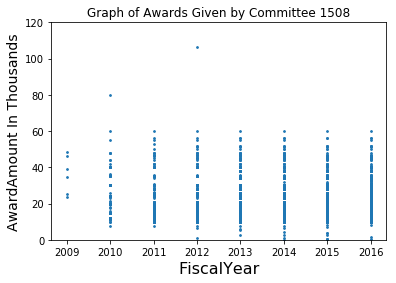

In [5]:
# Plot Settings
data = mathFundingData

xAxis = 'FiscalYear'
yAxis = 'AwardAmount'

yAxisRange = [0,120]
yScalingFactor = 10**3
yScalingFactorString = ' In Thousands'

plotPointSizes = 3 

title = 'Graph of Awards Given by Committee 1508'

# Make the Plot
axes = plt.gca()
x = data[xAxis]
plt.xlabel(xAxis, fontsize=16)

y = data[yAxis]
plt.ylabel(yAxis+yScalingFactorString, fontsize=14)
axes.set_ylim(yAxisRange)
y = y/yScalingFactor

plt.title(title)

plot = plt.scatter(x,y,s=plotPointSizes)

plt.show()

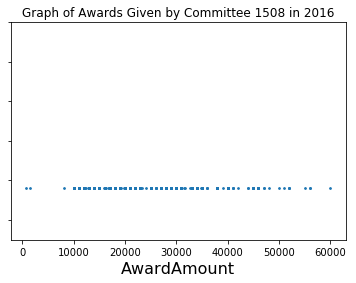

In [11]:
# Plot Settings
year = 2016
data = mathFundingData.loc[(mathFundingData['FiscalYear'] == year)]

yAxis = 'FiscalYear'
xAxis = 'AwardAmount'

xScalingFactor = 10**3
xScalingFactorString = ' In Thousands'

yAxisRange = [1.99,2.1]

plotPointSizes = 3 

title = 'Graph of Awards Given by Committee 1508 in 2016'

# Make the Plot
axes = plt.gca()
x = data[xAxis]
plt.xlabel(xAxis, fontsize=16)

y = data[yAxis]
#plt.ylabel(yAxis+yScalingFactorString, fontsize=14)
axes.set_ylim(yAxisRange)
y = y/yScalingFactor
axes.set_yticklabels([]) # make it so the y axis is not numbered

plt.title(title)

plot = plt.scatter(x,y,s=plotPointSizes)

plt.show()

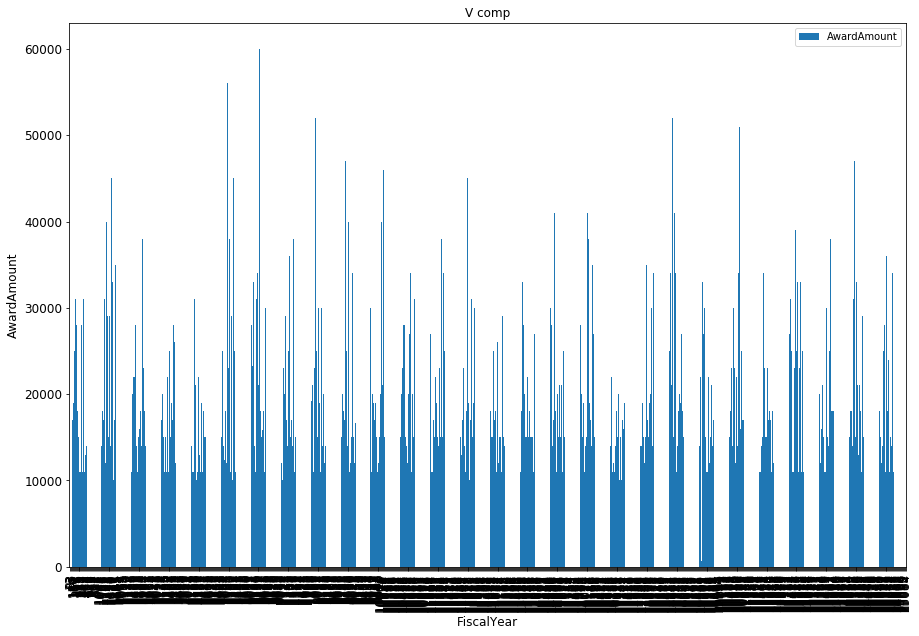

In [12]:
ax = data[[xAxis]].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel(yAxis, fontsize=12)
ax.set_ylabel(xAxis, fontsize=12)
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ac95cfc50>], dtype=object)

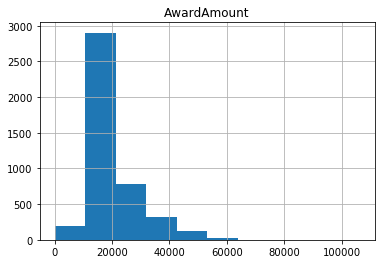

In [20]:
# Plot Settings
year = 2016
data = mathFundingData.loc[(mathFundingData['FiscalYear'] == year)]

xAxis = 'FiscalYear'
#xAxis = 'AwardAmount'

xScalingFactor = 10**3
xScalingFactorString = ' In Thousands'

yAxisRange = [1.99,2.1]

plotPointSizes = 3 

title = 'Graph of Awards Given by Committee 1508 in 2016'

# Make the Plot

mathFundingData.hist(column='AwardAmount', ax=plt.gca())

In [8]:
# Make the Plot Interactive 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.tools as tls
import matplotlib.pylab as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

fig = plt.Figure()
axes = fig.gca()

axes.plot(x,y)
canvas = FigureCanvas(fig)
plotly_fig = tls.mpl_to_plotly(fig)
py.iplot(plotly_fig)